# Machine Learning Algorithm: Gradient Descent

This notebook is about how the Gradient Descent algorithm works.

*Notice: The capital letter **X** describes a set of data instances, while the lowercase **x** describes one single instance.*

Our starting point is the equation: $ y = a*x + b $

Now let's say we have some data X



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate some Synthetic Data

In order to demonstrate gradient descent we need some data. Artifical ones are easy to get and perfect to demonstrate the concept. Therefore, following are two methods for creating data:
    * gen_Data() - generates a certain amount of correlating data (samples) between -1 and 10
    * gen_Data_simple() - generate data which follow the function f(x) = x + 2

In [2]:
def gen_Data(samples=1000, noiseFactor=5):
    pure = np.linspace(-1, 10, samples)
    noise = np.random.normal(0, noiseFactor, samples)
    data = pure + noise
    return data, np.arange(0,samples)

def gen_Data_simple(samples=10):
    x = np.arange(0,10)
    y = np.arange(2,12)
    return x,y
    
    

In [3]:
## Get a new set of data 
lSamples = 10
lNoise = 0.8

# Get a set of new data 
X,y = gen_Data_simple(samples=lSamples)   # Simple dataset where you get a nearly perfect fit
#X,y = gen_Data(samples=lSamples, noiseFactor=lNoise) # synthetic dataset with noise



First 10 entries of the data set 
      X           y  
[[ 0  2]
 [ 1  3]
 [ 2  4]
 [ 3  5]
 [ 4  6]
 [ 5  7]
 [ 6  8]
 [ 7  9]
 [ 8 10]
 [ 9 11]]


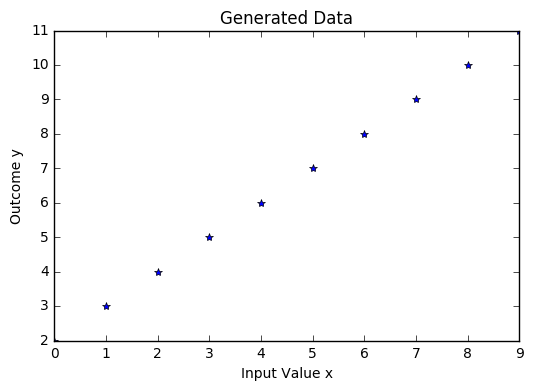

In [4]:
print("First 10 entries of the data set ")
print("      X           y  ")
print(np.concatenate((X.reshape(lSamples,1), y.reshape(lSamples,1)), axis=1)[0:10])


ax1 = plt.subplot(111)
ax1.plot(X,y,'*')
ax1.set_title('Generated Data')
ax1.set_xlabel('Input Value x')
ax1.set_ylabel('Outcome y')
#ax1.set_xlim([-1.5, lSamples+1])
#ax1.set_ylim([-1.5, lSamples+1])


##### Adding a Bias vector
Adding a bias vector helps to solve the equations in a vectorized manner.
So, you got a data vector $ X_{Nx1} $ which has to be multiplied with your equation vector 
consisting out of the  the slope (a) and the intercept term (b).

$X = \begin{bmatrix}x_0 \\ \dots \\ x_N\end{bmatrix}_{Nx1}
W = \begin{bmatrix}a & b\end{bmatrix}_{2x1}$

    * can't calculate vectorized since dimension mismatch
    * add 1's vector for b since there is no X on b so it will be always b*1 
    * doesn't change anything but the fact that we now can calucalte it vectorized

$X = \begin{bmatrix}1 & x_0 \\ \dots & \dots \\1 & x_N\end{bmatrix}_{Nx2}
W = \begin{bmatrix}0.881 & 0.454\end{bmatrix}_{2x1}$


In [5]:
# y = mx + b
# add bias vector (b) => X_0 => a*x_1 + b*X_0
#X = np.c_[np.ones((X.shape[0])), X]
X = np.c_[X, np.ones((X.shape[0]))]
print(X[0:5])

[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]


In [6]:
# initialize our weight matrix such it has the same number of
# columns as our input features + the intercept term
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
print("initial weights: ", W)


[INFO] starting training...
initial weights:  [ 0.96454631  0.58045692]


## Vectorizied version (working)

In [7]:
def costFunction(X,y,W):
#          nx2 * 2x1
    return (X.dot(W) - y) **2
    
    

Final error:  0.0193383636927
Weights [ 1.01303298  1.91827556]
F(x) = 1.9182755599631613x + 1.0130329832132292 


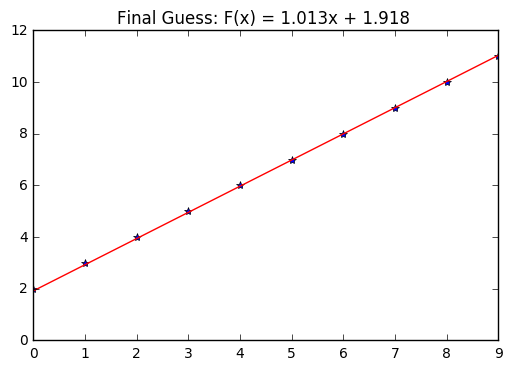

In [8]:
for i in range(0,2000):
    alpha = 0.005
    hypothesis = X.dot(W)
    loss = hypothesis - y
    cost = np.sum(loss **2) / (2*len(X))
    X.shape # 10x2
    loss.shape # 10x1
    gradient = X.T.dot(loss) / len(X)  #  [ 0.16637658,  0.83162735]
    #gradient = loss.T.dot(X) / len(X)  #  [ 0.16637658,  0.83162735]

    W = W - alpha*gradient

    # FINAL GUESS

#W = [ 1.82217773, .9999]
pred = X.dot(W)
#pred = theta[0] * X[0:,1:2] + theta[1]



plt.plot(X[0:,0:1],y, "*")
plt.plot(X[0:,0:1],pred, "-r")
plt.title("Final Guess: F(x) = {0:.3F}x + {1:.3F} ".format(W[0],W[1]))

print("Final error: ", np.sum(costFunction(X=X, y=y,W=W)))
print("Weights", W)
print("F(x) = {0}x + {1} ".format(W[1],W[0]))

## Naive implementation (Step-by-Step)

$$ E = \sum_{i=1}^n (y_i - (ax_i + b) )^2 $$

Using the chain rule: 
\begin{align} 
\frac{\partial E}{\partial a}
   = 2 \left( y_i - (ax_i + b)\right) * -x_i  
\end{align}


\begin{align} 
\frac{\partial E}{\partial b}
   = 2 \left( y_i - (ax_i + b)\right) * -1 \\
   = -2 \left( y_i - (ax_i + b)\right)
\end{align}


In [9]:
def calcError(data,y, weights):
    sumError = 0
    yp = weights[0] * data[0:,0:1] + weights[1] * data[0:,1:2]
    #sumError = np.sum((yp - y) ** 2)
    sumError = np.sum((y - yp)**2)
    
    return sumError #/ float(data.shape[0])

In [10]:
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
print("initial weights: ", W)

y = y.reshape(y.shape[0],1)

[INFO] starting training...
initial weights:  [ 0.08348356  0.82137752]


Current loss:  350.512608262


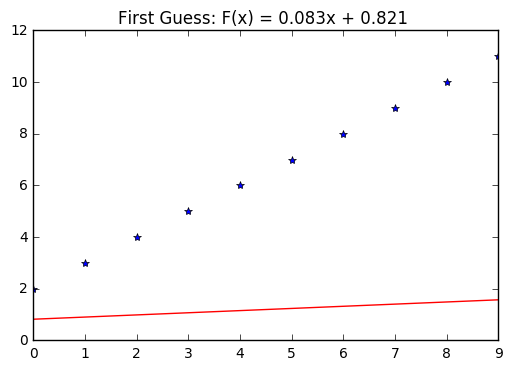

In [11]:
# FIRST GUESS

# calculate first loss
currentLoss = calcError(X,y,W)
print("Current loss: ", currentLoss)

# y = ax + b  W = [a , b] , 1x2
pred = W[0] * X[0:,0:1] + W[1]
plt.plot(X[0:,0:1], y,    "*")
plt.plot(X[0:,0:1], pred, "-r")
plt.title("First Guess: F(x) = {0:.3F}x + {1:.3F} ".format(W[0],W[1]))

In [12]:
# doing one step of gradient descent

alpha = 0.0001 # learning rate
N = float(len(X))

gradient_a = (-2*X[0:,0:1]).T.dot( y - (W[0]*X[0:,0:1] + W[1]*X[0:,1:2]) )[0][0]
gradient_b = -2 * np.sum( (y - (W[0]*X[0:,0:1] + W[1]*X[0:,1:2])) )

   

print("Gradients:\na: {0} \nb: {1}".format(gradient_a, gradient_b))

Gradients:
a: -628.4903939331352 
b: -106.05892920165498


In [13]:
# calculating the new weights
new_a = W[0] - (alpha * gradient_a)
new_b = W[1] - (alpha * gradient_b)


print("Weight adjustment:\na: {0} | {1} \nb: {2} | {3}".format(W[0], new_a, W[1], new_b ))

Weight adjustment:
a: 0.08348356045037664 | 0.14633259984369018 
b: 0.8213775178905569 | 0.8319834108107224


Current loss:  311.074607755


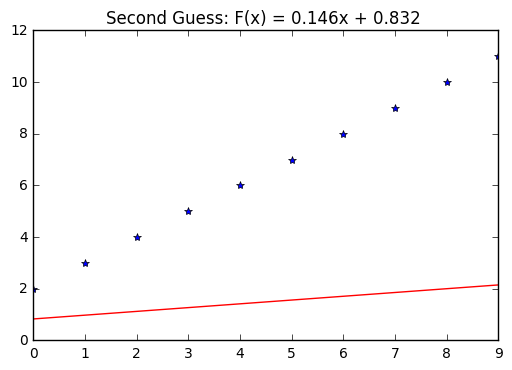

In [14]:
# MAKE ANOTHER GUESS

# Set new calculated weights as new W to use
W = np.array([new_a,new_b])


# calculate loss (compare it with the initial one. It should be less now.)
currentLoss = calcError(X,y,W)
print("Current loss: ", currentLoss)


pred = W[0] * X[0:,0:1] + W[1]*X[0:,1:2]

plt.plot(X[0:,0:1], y, "*")
plt.plot(X[0:,0:1], pred, "-r")
plt.title("Second Guess: F(x) = {0:.3F}x + {1:.3F} ".format(W[0],W[1]))

In [15]:
# NOW RUN UNTIL (PROB.) CONVERGENCE
# Run the algorithm 20000 times. While that, if the loss isn't much improving, stop the training.

alpha = 0.0001 # learning rate
N = float(len(X))

prevLoss = 1000000000
improvement = 0.0001

for epoch in range(0,20000):
    
    gradient_a = (-2*X[0:,0:1]).T.dot( y - (W[0]*X[0:,0:1] + W[1]*X[0:,1:2]) )
    gradient_b = -2 * np.sum( (y - (W[0]*X[0:,0:1] + W[1]*X[0:,1:2])) )

    #print("Gradients:\na: {0} \nb: {1}".format(gradient_a, gradient_b))
    W[0] = W[0] - (alpha * gradient_a)
    W[1] = W[1] - (alpha * gradient_b)

    #print("Weight adjustment:\na: {0} | {1} \nb: {2} | {3}".format(W[0], new_a, W[1], new_b ))
    
    # calculate loss
    currentLoss = calcError(X,y,W)
    if(epoch % 25 == 0):
        print("Epoch ({0}) - Current loss: {1} Weights: {2}/{3}".format(epoch, currentLoss,W[1],W[0]))
    
    if(prevLoss-currentLoss < improvement):
        print ("Stopping at {0} epoch. Improvement is less than {1}".format(epoch, improvement))
        break;
    else:
        prevLoss = currentLoss
    
    


Epoch (0) - Current loss: 276.11070738550643 Weights: 0.8420024505905077/0.20550379095530336
Epoch (25) - Current loss: 16.304495113598716 Weights: 0.9745868079721686/0.9462015705713238
Epoch (50) - Current loss: 3.4307384953747695 Weights: 1.0147890214387973/1.1088808385071034
Epoch (75) - Current loss: 2.7233806506639096 Weights: 1.0343359486343962/1.143293180631224
Epoch (100) - Current loss: 2.617397670249074 Weights: 1.0491494613414192/1.1492604785268752
Epoch (125) - Current loss: 2.543020532370287 Weights: 1.0627655030089973/1.1489378334644798
Epoch (150) - Current loss: 2.472126296965662 Weights: 1.0759709349899673/1.14724223453524
Epoch (175) - Current loss: 2.403275945272158 Weights: 1.0889424318671412/1.1452646819960643
Epoch (200) - Current loss: 2.3363464464907397 Weights: 1.1017212089864612/1.1432470036573992
Epoch (225) - Current loss: 2.2712810496960474 Weights: 1.1143183884793038/1.1412425582571177
Epoch (250) - Current loss: 2.208027680701665 Weights: 1.12673838561093

Final error:  0.0884342212259
Weights [ 1.02787046  1.82523588]
F(x) = 1.0278704609694465x + 1.8252358819901935 


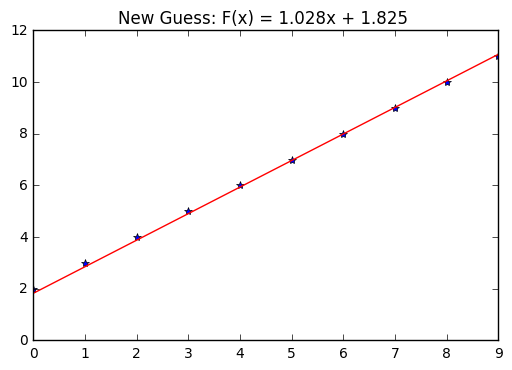

In [16]:
# FINAL GUESS : See the result of the final model (nearly a perfect match)


pred = W[0] * X[0:,0:1] + W[1] * X[0:,1:2]
#pred = theta[0] * X[0:,1:2] + theta[1]


plt.plot(X[0:,0:1], y, "*")
plt.plot(X[0:,0:1], pred, "-r")

plt.title("New Guess: F(x) = {0:.3F}x + {1:.3F} ".format(W[0],W[1]))

print("Final error: ", calcError(data=X, y=y,weights=W))
print("Weights", W)
print("F(x) = {0}x + {1} ".format(W[0],W[1]))

In [17]:
# Result overview
results = pd.DataFrame({'X':X[0:,0:1].reshape(len(X)), 'y':y.reshape(len(y)), 'y_pred':pred.reshape(len(pred))})
results

,X,y,y_pred
0,0.0,2,1.825236
1,1.0,3,2.853106
2,2.0,4,3.880977
3,3.0,5,4.908847
4,4.0,6,5.936718
5,5.0,7,6.964588
6,6.0,8,7.992459
7,7.0,9,9.020329
8,8.0,10,10.048200
9,9.0,11,11.076070
